<a href="https://colab.research.google.com/github/bharathbolla/EVA4/blob/S9/EVA_S9Quizz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 19:50:37.532776


In [11]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA4/S9Quiz/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/EVA4/S9Quiz


In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torchvision.transforms as transforms
import quizzloader as d
import quizdnn as dnn
import quizztrain_test as t

truck  frog  frog plane


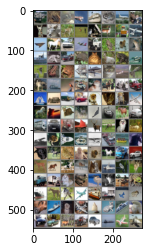

In [13]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(d.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
!pip install torchsummary


In [15]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = dnn.QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4           [-1, 64, 32, 32]          36,928
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]          36,928
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14           [-1, 64,

In [16]:
model =  dnn.QuizDNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay=0)
# scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
loss_func=nn.CrossEntropyLoss()
 
for epoch in range(10):
    print("Epoch:", epoch)
    t.train(model, device, d.train_loader, optimizer, loss_func, epoch, l1=False)
    # scheduler.step()
    t.test(model, device, d.test_loader, nn.CrossEntropyLoss(reduction='sum'))

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch: 0


Loss=0.9328867197036743 Batch_id=390 Accuracy=54.56: 100%|██████████| 391/391 [00:12<00:00, 31.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2091, Accuracy: 5552/10000 (55.52%)

Epoch: 1


Loss=0.6043190360069275 Batch_id=390 Accuracy=71.51: 100%|██████████| 391/391 [00:12<00:00, 31.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8944, Accuracy: 6979/10000 (69.79%)

Epoch: 2


Loss=0.6674599647521973 Batch_id=390 Accuracy=78.72: 100%|██████████| 391/391 [00:12<00:00, 30.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6685, Accuracy: 7704/10000 (77.04%)

Epoch: 3


Loss=0.38196036219596863 Batch_id=390 Accuracy=82.78: 100%|██████████| 391/391 [00:12<00:00, 31.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6524, Accuracy: 7735/10000 (77.35%)

Epoch: 4


Loss=0.613000750541687 Batch_id=390 Accuracy=85.92: 100%|██████████| 391/391 [00:12<00:00, 31.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5977, Accuracy: 7973/10000 (79.73%)

Epoch: 5


Loss=0.25856146216392517 Batch_id=390 Accuracy=88.34: 100%|██████████| 391/391 [00:12<00:00, 32.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5727, Accuracy: 8059/10000 (80.59%)

Epoch: 6


Loss=0.2880404591560364 Batch_id=390 Accuracy=90.23: 100%|██████████| 391/391 [00:12<00:00, 31.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5609, Accuracy: 8180/10000 (81.80%)

Epoch: 7


Loss=0.17114651203155518 Batch_id=390 Accuracy=91.98: 100%|██████████| 391/391 [00:12<00:00, 32.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5651, Accuracy: 8258/10000 (82.58%)

Epoch: 8


Loss=0.30861616134643555 Batch_id=390 Accuracy=93.44: 100%|██████████| 391/391 [00:12<00:00, 32.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6187, Accuracy: 8198/10000 (81.98%)

Epoch: 9


Loss=0.08529369533061981 Batch_id=390 Accuracy=94.28: 100%|██████████| 391/391 [00:12<00:00, 31.57it/s]



Test set: Average loss: 0.6183, Accuracy: 8240/10000 (82.40%)



In [0]:
from torchsummary import summary

In [18]:
from datetime import datetime 
print("Current exist Date/Time: ", datetime.now())

Current exist Date/Time:  2020-03-21 19:53:29.041881
